# **Final Project**
### **ADS 505 Applied Data Science for Business**
__Team 6:__ Lai Ieng Chan, Ben Earnest, Saba Alemayehu

## **Import of Packages and Libraries**

In [ ]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
from pathlib import Path
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB 
warnings.filterwarnings('ignore')

## **Load Data**

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/cross_sell_dataset.tab', sep='\t'))
df

,cross_buy,acad_title,age,calls,complaints,customer_tenure_months,directmails,gender,joint_account,inflows,...,volume_debit,volume_debit_6months,ext_city_size,ext_house_size,ext_purchase_power,ext_share_new_houses,ext_share_new_cars,ext_car_power,ext_living_duration,giro_mailing
0,0,0,60,0,0,221,0,0.0,0.0,0.0,...,0.00,0.00,7.0,4.0,5.0,4.0,4.0,3.0,9.0,0
1,0,0,55,0,0,227,0,0.0,1.0,0.0,...,3.28,3.28,7.0,1.0,7.0,1.0,3.0,1.0,NaN,0
2,0,0,61,0,0,221,0,1.0,0.0,3000.0,...,31963.13,28963.13,8.0,4.0,4.0,1.0,7.0,3.0,9.0,0
3,0,0,70,0,0,222,0,0.0,0.0,6000.0,...,54048.40,48048.40,2.0,1.0,7.0,3.0,5.0,4.0,9.0,0
4,0,1,61,0,0,227,0,1.0,0.0,0.0,...,1374743.09,1341722.91,4.0,1.0,7.0,3.0,6.0,5.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,53,0,0,206,0,0.0,0.0,3300.0,...,28839.32,25611.08,5.0,1.0,5.0,1.0,7.0,5.0,9.0,0
99996,1,0,25,0,0,206,1,0.0,0.0,150.0,...,2133.01,1983.01,1.0,1.0,3.0,5.0,2.0,1.0,9.0,0
99997,1,0,19,0,0,205,1,1.0,0.0,2350.0,...,47476.22,41939.13,8.0,3.0,5.0,1.0,6.0,1.0,9.0,0
99998,1,0,58,0,0,204,0,1.0,0.0,0.0,...,1573.06,1373.06,8.0,1.0,7.0,1.0,NaN,NaN,7.0,0


In [ ]:
# Summary Information about the variables and their types in the data:
data_desc = pd.DataFrame(pd.read_csv('/content/Data Set Description.tab', sep='\t'))
data_desc

,Variable,VariableName,Operationalization
0,Dependent Variable,NaN,NaN
1,cross_buy,Cross-buy,"Customer opened a checking account: 1 (yes), 0..."
2,Transaction Data,NaN,NaN
3,calls,Calls,Number of calls in last 180 days
4,complaints,Complaints,Number of complaints in last year
5,customer_tenure_months,Customer Tenure,Number of months since customer onboarding
6,inflows,Inflows,Total volume of inflows on savings account fro...
7,last_acc_opening_days,Last Account,Number of days since last account opening
8,logins_desktop,Desktop Logins,Number of logins in the last 180 days
9,logins_mobile,Mobile Logins,Number of mobile sessions in the last 180 days


## **Exploratory Data Analysis**

### **Initial Investigation into the Dataset and the Response Variable**

In [ ]:
# View columns, dimensions, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cross_buy                  100000 non-null  int64  
 1   age                        100000 non-null  int64  
 2   calls                      100000 non-null  int64  
 3   complaints                 100000 non-null  int64  
 4   customer_tenure_months     100000 non-null  int64  
 5   gender                     100000 non-null  float64
 6   joint_account              100000 non-null  float64
 7   member_get_member_active   100000 non-null  int64  
 8   member_get_member_passive  100000 non-null  int64  
 9   nr_products                100000 non-null  int64  
 10  prod_savings               100000 non-null  int64  
 11  volume_debit               100000 non-null  float64
 12  giro_mailing               100000 non-null  int64  
 13  marital_status_divorced    100

In [ ]:
# The dimension of the dataset
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 100000
Number of Columns: 25


In [ ]:
# check for missing values
df.isnull().sum()

cross_buy                    0
age                          0
calls                        0
complaints                   0
customer_tenure_months       0
gender                       0
joint_account                0
member_get_member_active     0
member_get_member_passive    0
nr_products                  0
prod_savings                 0
volume_debit                 0
giro_mailing                 0
marital_status_divorced      0
marital_status_married       0
marital_status_separated     0
marital_status_single        0
marital_status_unmarried     0
marital_status_widowed       0
ext_purchase_power_2.0       0
ext_purchase_power_3.0       0
ext_purchase_power_4.0       0
ext_purchase_power_5.0       0
ext_purchase_power_6.0       0
ext_purchase_power_7.0       0
dtype: int64

**Response variable - cross_buy**

In [ ]:
# Check Target Class Distribution
# 0 = Customers didn't open a checking account
# 1 = Customers opened a checking account
df['cross_buy'].value_counts()

0    90000
1    10000
Name: cross_buy, dtype: int64

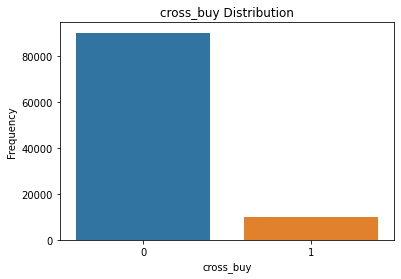

In [ ]:
# Plot Class Distribution
sns.countplot(data = df, x = 'cross_buy')
plt.xlabel('cross_buy')
plt.ylabel('Frequency')
plt.title('cross_buy Distribution')
plt.show()

**"cross_buy" tells us if an existing customer opened a checking account. From here we see that 10,000 customers out of the 10,000 customers did.**

**For this problem, the class imbalancement might have an effect since 90% of the data are in one class and there aren't enough negative and positive classes for training. We should resample the data so that more customers would seemed to open the bank account.**

**Note, the cross buy rate for the existing customers is 10%.  So our baseline suggests randomly selecting customers to contact for checking accounts will result in a 10% success rate.**

### **Investigation in other Independent Variables**

**Selected Numerical Features**

In [ ]:
# Subsetting the selected numerical features into a dataset
num_features = df[['age','calls', 'complaints', 'customer_tenure_months', 'nr_products', 'directmails']]

# Retunr decription of the numerical features
num_features.describe()

,age,calls,complaints,customer_tenure_months,nr_products,directmails
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.892260,0.104600,0.003530,140.181700,1.433380,0.470660
std,14.534085,0.564395,0.078598,74.901654,0.798579,0.915952
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,39.000000,0.000000,0.000000,78.000000,1.000000,0.000000
50%,51.000000,0.000000,0.000000,160.000000,1.000000,0.000000
75%,60.000000,0.000000,0.000000,201.000000,2.000000,1.000000
max,80.000000,58.000000,8.000000,567.000000,17.000000,9.000000


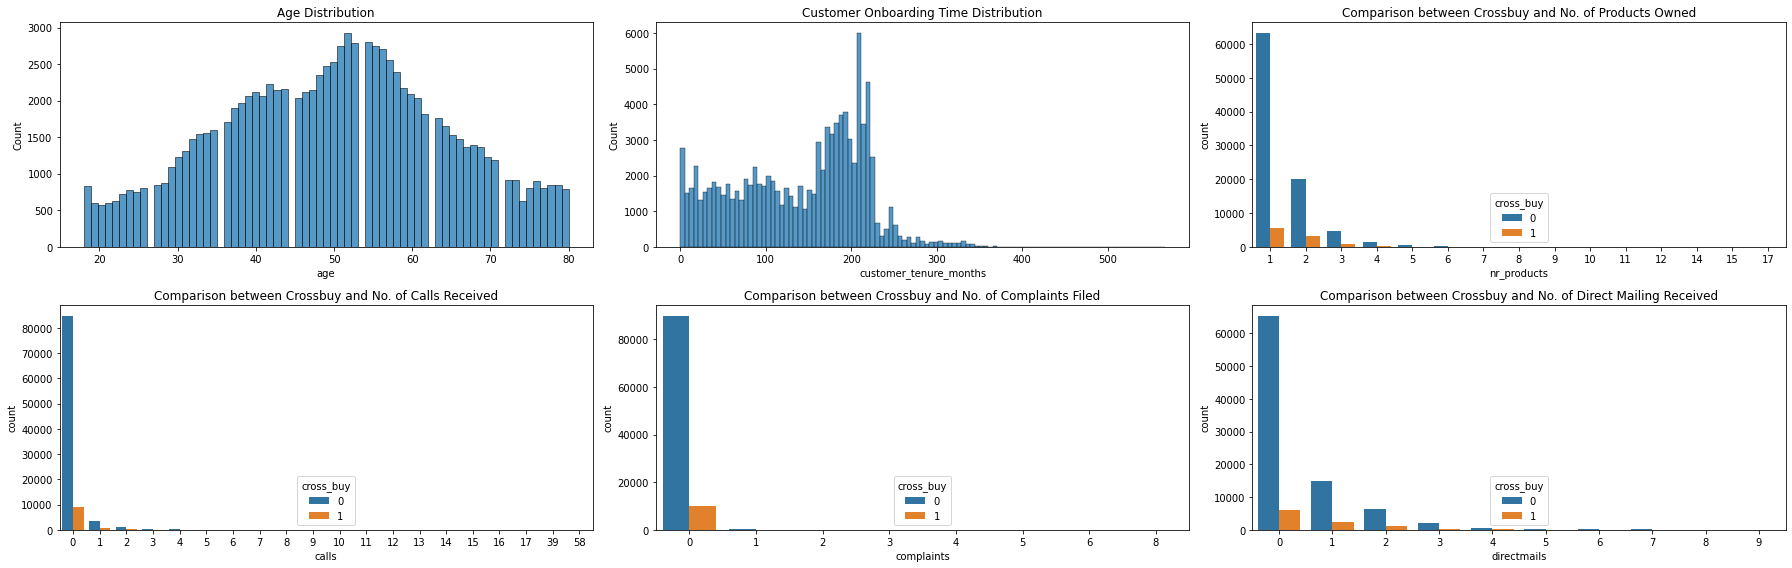

In [ ]:
# Plot Features
%matplotlib inline
f, axs = plt.subplots(2, 3, figsize = (25, 8))

# Customer's age in years
sns.histplot(data = df, x = 'age', ax = axs[0,0])

# Number of months since customer onboarding
sns.histplot(data = df, x = 'customer_tenure_months', ax = axs[0,1])

# Number of products (accounts) that customers own
crosstab_nr_products = pd.crosstab(df['nr_products'], df['cross_buy'])
plot_nr_products = sns.countplot(data = df, x = 'nr_products', hue = 'cross_buy', ax = axs[0,2])

# Number of calls customers get in the last year
crosstab_calls = pd.crosstab(df['calls'], df['cross_buy'])
plot_calls = sns.countplot(data = df, x = 'calls', hue = 'cross_buy', ax = axs[1,0])

# Number of complaints in the last year
crosstab_complaints = pd.crosstab(df['complaints'], df['cross_buy'])
plot_complaints = sns.countplot(data = df, x = 'complaints', hue = 'cross_buy', ax = axs[1,1])

# Number of direct mailing in the last year
crosstab_directmails = pd.crosstab(df['directmails'], df['cross_buy'])
plot_directmails = sns.countplot(data = df, x = 'directmails', hue = 'cross_buy', ax = axs[1,2])

# Setting plot labels
axs[0, 0].title.set_text("Age Distribution")
axs[0, 1].title.set_text("Customer Onboarding Time Distribution")
axs[0, 2].title.set_text("Comparison between Crossbuy and No. of Products Owned")
axs[1, 0].title.set_text("Comparison between Crossbuy and No. of Calls Received")
axs[1, 1].title.set_text("Comparison between Crossbuy and No. of Complaints Filed")
axs[1, 2].title.set_text("Comparison between Crossbuy and No. of Direct Mailing Received")

plt.tight_layout()

**Selected Binary Features**

In [ ]:
# Subsetting the selected binary features into a dataset
bi_features = df[['joint_account','member_get_member_active', 'member_get_member_passive', 'giro_mailing','acad_title','gender']]

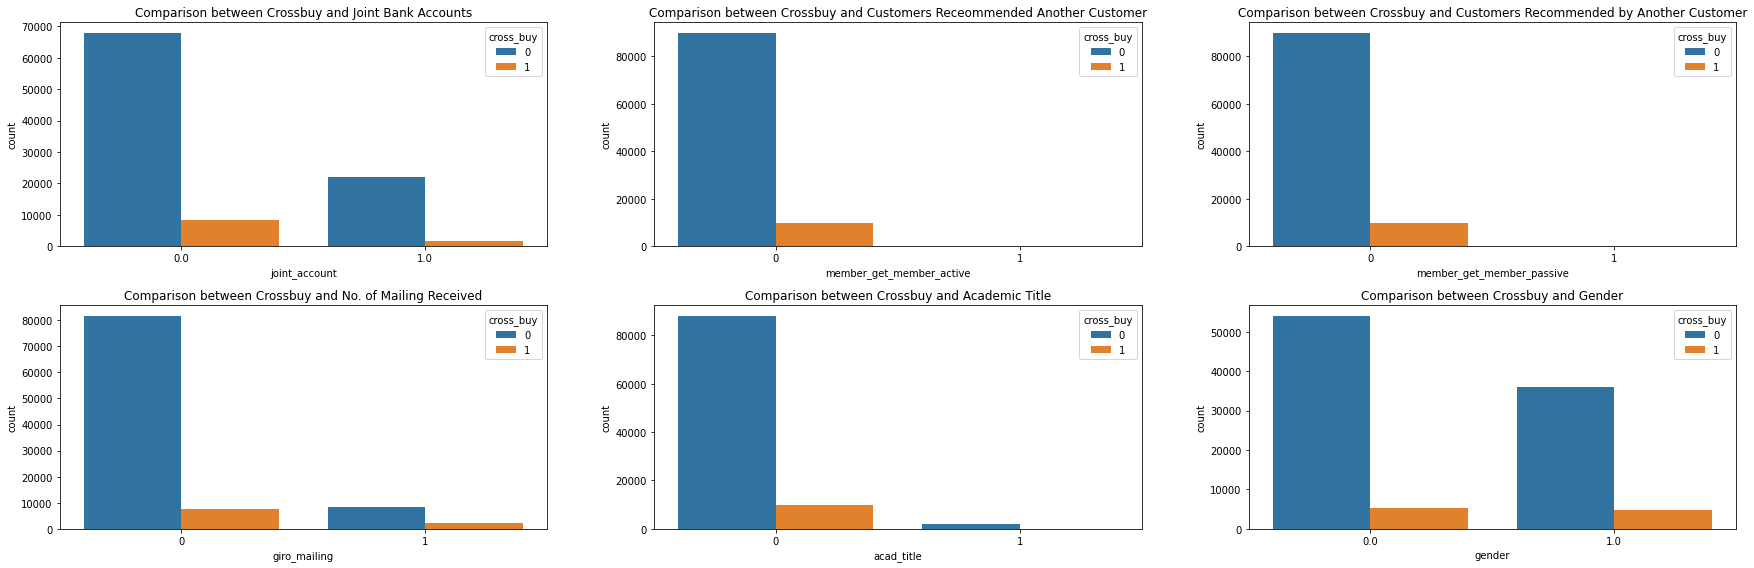

In [ ]:
# Plot Features
%matplotlib inline
f, axs = plt.subplots(2, 3, figsize = (25, 8))

# Whether a customer has a joint bank account: 1 (yes), 0 (no)
crosstab_joint_account = pd.crosstab(df['joint_account'], df['cross_buy'])
plot_joint_account = sns.countplot(data = df, x = 'joint_account', hue = 'cross_buy', ax = axs[0,0])

# Whether a customer recommended a customer: 1 (yes), 0 (no)
crosstab_member_get_member_active = pd.crosstab(df['member_get_member_active'], df['cross_buy'])
plot_member_get_member_active = sns.countplot(data = df, x = 'member_get_member_active', hue = 'cross_buy', ax = axs[0,1])

# Whether a customer was recommended by a customer: 1 (yes), 0 (no)
crosstab_member_get_member_passive = pd.crosstab(df['member_get_member_passive'], df['cross_buy'])
plot_member_get_member_passive = sns.countplot(data = df, x = 'member_get_member_passive', hue = 'cross_buy', ax = axs[0,2])

# Whether a customer received an email about opening a checking account: 1 (yes), 0 (no)
crosstab_giro_mailing = pd.crosstab(df['giro_mailing'], df['cross_buy'])
plot_giro_mailing = sns.countplot(data = df, x = 'giro_mailing', hue = 'cross_buy', ax = axs[1,0])

# Whether he customer have an academic title: 1 (yes), 0 (no)
crosstab_acad_title = pd.crosstab(df['acad_title'], df['cross_buy'])
plot_acad_title = sns.countplot(data = df, x = 'acad_title', hue = 'cross_buy', ax = axs[1,1])

# Customer's gender: 1 (male), 0 (female)
crosstab_gender = pd.crosstab(df['gender'], df['cross_buy'])
plot_gender = sns.countplot(data = df, x = 'gender', hue = 'cross_buy', ax = axs[1,2])

# Setting plot labels
axs[0, 0].title.set_text("Comparison between Crossbuy and Joint Bank Accounts")
axs[0, 1].title.set_text("Comparison between Crossbuy and Customers Receommended Another Customer")
axs[0, 2].title.set_text("Comparison between Crossbuy and Customers Recommended by Another Customer")
axs[1, 0].title.set_text("Comparison between Crossbuy and No. of Mailing Received")
axs[1, 1].title.set_text("Comparison between Crossbuy and Academic Title")
axs[1, 2].title.set_text("Comparison between Crossbuy and Gender")
plt.tight_layout()

**Financial Products that customers own:**

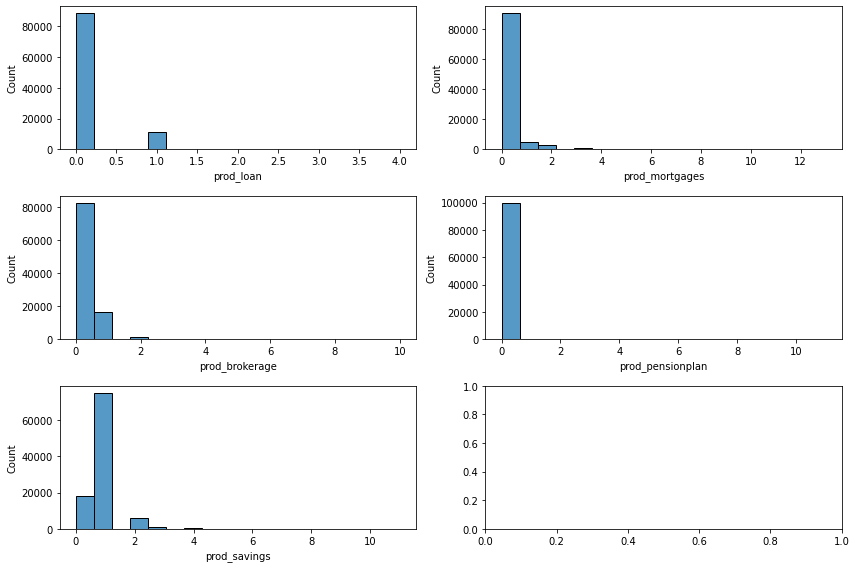

In [ ]:
# Plot the financial products that consumers have     
%matplotlib inline

f, axs = plt.subplots(3, 2, figsize = (12, 8))

# Distribution of number of loan accounts consumers have
sns.histplot(data = df, x = 'prod_loan', ax = axs[0,0])

# Distribution of number of mortgage accounts consumers have
sns.histplot(data = df, x = 'prod_mortgages', ax = axs[0,1])

# Distribution of number of investment accounts consumers have
sns.histplot(data = df, x = 'prod_brokerage', ax = axs[1,0])

# Distribution of number of long-term savings accounts consumers have
sns.histplot(data = df, x = 'prod_pensionplan', ax = axs[1,1])

# Distribution of number of savings accounts consumers have
sns.histplot(data = df, x = 'prod_savings', ax = axs[2,0])

plt.tight_layout()

**We can see that most customers own a savings account but not the other financial accounts.**

### **Visualizing Outliers**

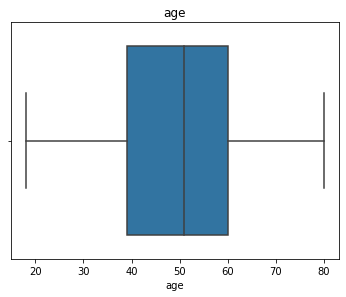

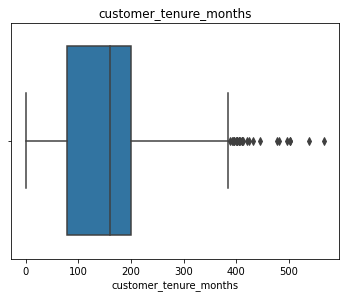

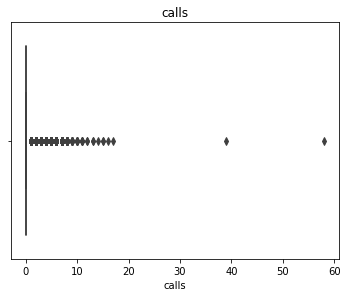

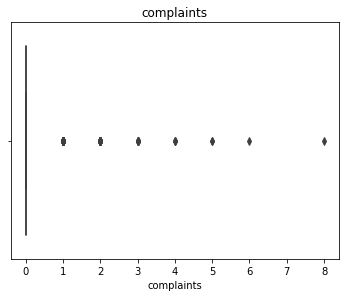

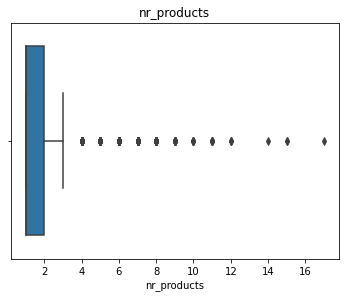

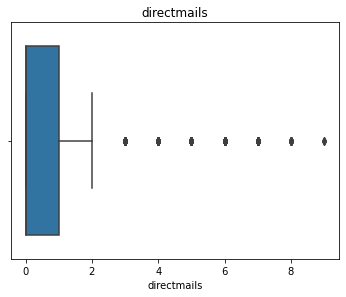

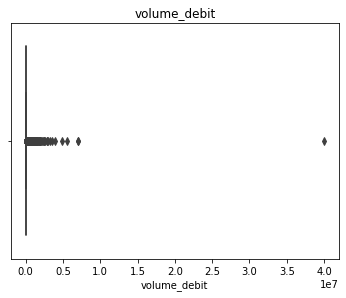

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing each variables outlier
col = df[['age','customer_tenure_months','calls',
                 'complaints','nr_products',
                 'directmails','volume_debit']]
            
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

plt.tight_layout()

### **Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix')

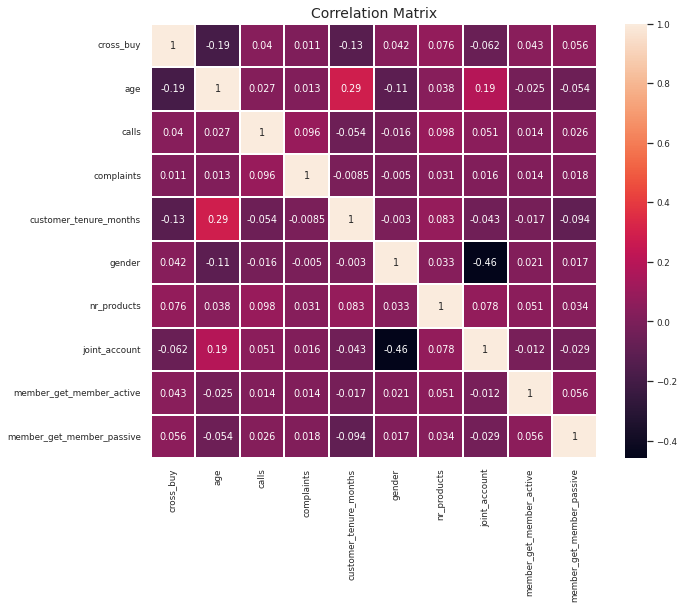

In [ ]:
# Selecting more relevant variables to compute the correlation matrix
df_corr = df[['cross_buy','age', 'calls', 'complaints','customer_tenure_months', 'gender','nr_products','joint_account','member_get_member_active','member_get_member_passive','marital_status']]

corrMatrix = df_corr.corr()
plt.subplots(figsize = (10,8))
sns.set(font_scale = .8)
sns.heatmap(corrMatrix, annot = True, linewidths = 1)
plt.title(r'Correlation Matrix', fontsize = 14)

## **Pre-processing Data**

In [ ]:
# Check for missing values
df.isnull().sum()

cross_buy                        0
acad_title                       0
age                              0
calls                            0
complaints                       0
customer_tenure_months           0
directmails                      0
gender                           2
joint_account                    2
inflows                        473
last_acc_opening_days            0
logins_desktop                   0
logins_mobile                    0
marital_status                   0
member_get_member_active         0
member_get_member_passive        0
nr_products                      0
occupation                   51275
outflows                       473
prod_loan                        0
prod_mortgages                   0
prod_brokerage                   0
prod_pensionplan                 0
prod_savings                     0
relocations                      0
volume_debit                     0
volume_debit_6months          2998
ext_city_size                 2662
ext_house_size      

In [ ]:
# Columns including occupationshould be dropped since it contains mostly NaN values and 
# won't provide a lot of meaningful information. 
df = df.drop(columns=['occupation'])

**The curse of dimensionality means that the error increases with the increase in the number of features. Since we have 35 features, there is a need to select the important features and remove the irrelevant ones for better performance of the model.**

Regarding account balances, we have four features that describes the account balances:
*   inflows - It describes the total volume of inflows on savings account 
*   outflows - It describes the total volume of outflows on savings account
*   volume_debit - It describes the total balances of all debit (savings) accounts
*   volume_debit_6months - It describes the total balances of all debit (savings) accounts in six months

Since we are interested in knowing the account balances that customers have which will have a relationship with whether a customer will open a checking account, we will use the most relevant feature which is volume_debit, and drop the other features. 

Regarding the days since the account opened, we have features that described it:
*   customer_tenure_months - Number of months since customer onboarding
*   last_acc_opening_days - Number of days since last account opening

We selected the customer_tenure_months since that gives us a better idea of the time customers are with the bank. Thus, we will remove the other feature. 





In [ ]:
# Since we will be using the total balances of all accounts, we can drop the redundant features
df = df.drop(columns=['inflows','outflows','volume_debit_6months'])

# Also dropping duplicate feature last_acc_opening_days
df = df.drop(columns=['last_acc_opening_days'])

As mentioned above, most customers own 0 financial products except savings account, we would drop the irrelevant features and keep the prod_savings feature. 

In [ ]:
# Dropping the features of financial products that majority of consumers do not have since they are irrelevant
df = df.drop(columns=['prod_loan','prod_mortgages','prod_brokerage','prod_pensionplan'])

Looking at the external features including the following:
*   ext_city_size - City size
*   ext_house_size - Average number of households per building in the residential block
*   ext_purchase_power - Average purchase power in the residential block
*   ext_share_new_houses - Share of new buildings in the residential block
*   ext_share_new_cars - Share of new vehicle registrations in the residential block
*   ext_car_power - Predominant vehicle category in the neighborhood
*   ext_living_duration - Average duration of residence in the customer's building

The only features that are more relevant features to whether a customer will open a checking account will be the purchase power pf clients. The other features including city size, average number of households, etc. is a lot less relevant in impacting someone to open a checking account. Thus, we will remove the irrelevant features. 










In [ ]:
# Dropping irrelevant external factors that are less likely to affect if the consumer will open a checking account
df = df.drop(columns=['ext_city_size','ext_house_size','ext_share_new_houses','ext_share_new_cars','ext_car_power','ext_living_duration'])

Lastly, there are some other less irrelevant features that we consider removing prior to the training of model:
*   relocations - Number of relocations/address changes in the last year
*   acad_title - Whether the customer have an academic title
*   logins_desktop - Number of logins in the last 180 days
*   logins_mobile - Number of mobile sessions in the last 180 days





In [ ]:
# Dropping other less irrelevant factors to finalize the dataset for modeling
df = df.drop(columns=['relocations','acad_title','logins_desktop','logins_mobile','directmails'])

In [ ]:
df

,cross_buy,age,calls,complaints,customer_tenure_months,gender,joint_account,marital_status,member_get_member_active,member_get_member_passive,nr_products,prod_savings,volume_debit,ext_purchase_power,giro_mailing
0,0,60,0,0,221,0.0,0.0,divorced,0,0,2,0,0.00,5.0,0
1,0,55,0,0,227,0.0,1.0,married,0,0,1,1,3.28,7.0,0
2,0,61,0,0,221,1.0,0.0,married,0,0,1,1,31963.13,4.0,0
3,0,70,0,0,222,0.0,0.0,married,0,0,1,1,54048.40,7.0,0
4,0,61,0,0,227,1.0,0.0,married,0,0,2,1,1374743.09,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,53,0,0,206,0.0,0.0,married,0,1,2,1,28839.32,5.0,0
99996,1,25,0,0,206,0.0,0.0,single,0,0,1,1,2133.01,3.0,0
99997,1,19,0,0,205,1.0,0.0,single,0,0,2,1,47476.22,5.0,0
99998,1,58,0,0,204,1.0,0.0,married,0,0,1,0,1573.06,7.0,0


In [ ]:
# Converting categorical variables to dummies

# Treat marital_status and ext_purchase_power as categorical, then convert to dummy variables
df['marital_status'] = df['marital_status'].astype('category')
df['ext_purchase_power'] = df['ext_purchase_power'].astype('category')

df = pd.get_dummies(df, columns=['marital_status','ext_purchase_power'], drop_first=True)
df

,cross_buy,age,calls,complaints,customer_tenure_months,gender,joint_account,member_get_member_active,member_get_member_passive,nr_products,...,marital_status_separated,marital_status_single,marital_status_unmarried,marital_status_widowed,ext_purchase_power_2.0,ext_purchase_power_3.0,ext_purchase_power_4.0,ext_purchase_power_5.0,ext_purchase_power_6.0,ext_purchase_power_7.0
0,0,60,0,0,221,0.0,0.0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
1,0,55,0,0,227,0.0,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,61,0,0,221,1.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,70,0,0,222,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,61,0,0,227,1.0,0.0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,53,0,0,206,0.0,0.0,0,1,2,...,0,0,0,0,0,0,0,1,0,0
99996,1,25,0,0,206,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
99997,1,19,0,0,205,1.0,0.0,0,0,2,...,0,1,0,0,0,0,0,1,0,0
99998,1,58,0,0,204,1.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Check for missing values again
df.isnull().sum()

cross_buy                    0
age                          0
calls                        0
complaints                   0
customer_tenure_months       0
gender                       2
joint_account                2
member_get_member_active     0
member_get_member_passive    0
nr_products                  0
prod_savings                 0
volume_debit                 0
giro_mailing                 0
marital_status_divorced      0
marital_status_married       0
marital_status_separated     0
marital_status_single        0
marital_status_unmarried     0
marital_status_widowed       0
ext_purchase_power_2.0       0
ext_purchase_power_3.0       0
ext_purchase_power_4.0       0
ext_purchase_power_5.0       0
ext_purchase_power_6.0       0
ext_purchase_power_7.0       0
dtype: int64

In [ ]:
# imputation of missing data with mean imputer
mean_imputer = SimpleImputer(strategy='mean')
df[['gender','joint_account']] = pd.DataFrame(mean_imputer.fit_transform(df[['gender','joint_account']]))

In [ ]:
# Partition the data into training (60%) and validation (40%). Use seed = 1.
y = df['cross_buy']
X = df.drop(columns=['cross_buy'])

# Resampling the cross_buy variables using under-sampling techniques
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

In [ ]:
# Split the data in training and valid data
X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res, train_size=0.4, random_state=1)

In [ ]:
# Feature scaling transformation
scaler = preprocessing.StandardScaler()
scaler.fit(X)

X_train_norm = scaler.transform(X_train)
X_valid_norm = scaler.transform(X_valid)

## **Modeling**

### **Baseline Model - Simple Logistic Regression**

In [ ]:
# Build simple logistic regression model as baseline fit model
log = LogisticRegression(class_weight = 'balanced')
log.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
log_train_pred = log.predict(X_train_norm)
log_valid_pred = log.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
log_train_score = accuracy_score(log_train_pred, y_train)
log_valid_score = accuracy_score(log_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(log_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(log_valid_score, 2)))

Training Set Accuracy:0.81
Valid Set Accuracy:0.82


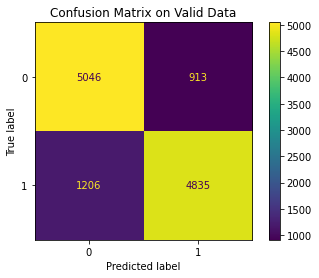

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5959
           1       0.84      0.80      0.82      6041

    accuracy                           0.82     12000
   macro avg       0.82      0.82      0.82     12000
weighted avg       0.82      0.82      0.82     12000



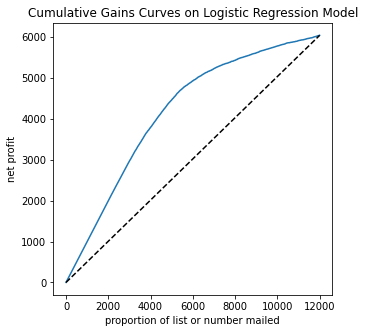

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(log, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, log_valid_pred))

# Cumulative gains curves of Logistic Regression model
log_prob = log.predict_proba(X_valid_norm)

log_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in log_prob],
    'p(1)': [p[1] for p in log_prob],
    'predicted': log.predict(X_valid_norm)})

log_gains_df = log_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(log_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Logistic Regression Model')
plt.show()

### **k-Nearest Neighbor Model**

In [ ]:
# Finding the best k for k-NN model
results = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_norm, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_valid, knn.predict(X_valid_norm))
    })
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.734917
1,2,0.737833
2,3,0.766333
3,4,0.760833
4,5,0.779917
5,6,0.774667
6,7,0.785500
7,8,0.776417
8,9,0.788500
9,10,0.780083


In [ ]:
# Based on this result, we select a k value of 7.
# The Euclidean distance function is selected
# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=7, metric ='euclidean')
knn.fit(X_train, y_train)

# Prediction on Training/valid Dataset
knn_train_pred = knn.predict(X_train_norm)
knn_valid_pred = knn.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
knn_train_score = accuracy_score(knn_train_pred, y_train)
knn_valid_score = accuracy_score(knn_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(knn_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(knn_valid_score, 2)))

Training Set Accuracy:0.51
Valid Set Accuracy:0.5


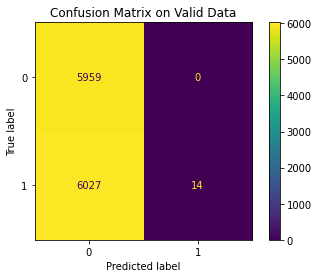

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      5959
           1       1.00      0.00      0.00      6041

    accuracy                           0.50     12000
   macro avg       0.75      0.50      0.33     12000
weighted avg       0.75      0.50      0.33     12000



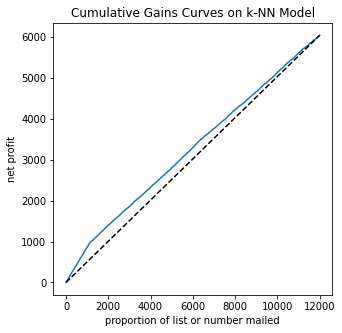

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(knn, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, knn_valid_pred))

# Cumulative gains curves of k-NN model
knn_prob = knn.predict_proba(X_valid_norm)

knn_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in knn_prob],
    'p(1)': [p[1] for p in knn_prob],
    'predicted': knn.predict(X_valid_norm)})

knn_gains_df = knn_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(knn_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on k-NN Model')
plt.show()

### **Decision Tree Model**

In [ ]:
# Look for the best parameters for the tree model:
param_grid = {
    'max_depth': [10,20,30,40],
    'min_samples_split': [10,40,60,80,100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
                          n_jobs=1)
gridSearch.fit(X_train_norm, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8811250000000002
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}


In [ ]:
# Update grid based on new result from initial grid:
param_grid = {
    'max_depth': list(range(2,16)),
    'min_samples_split': list(range(30, 42)),
    'min_impurity_decrease': [0, 0.00001, 0.00005, 0.0001]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
                          n_jobs=1)
gridSearch.fit(X_train_norm, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.883
Initial parameters:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 41}


In [ ]:
# Apply best parameters to train Decision Tree Model
dt = DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0,
                            min_samples_split=41)
dt.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
dt_train_pred = dt.predict(X_train_norm)
dt_valid_pred = dt.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
dt_train_score = accuracy_score(dt_train_pred, y_train)
dt_valid_score = accuracy_score(dt_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(dt_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(dt_valid_score, 2)))

Training Set Accuracy:0.89
Valid Set Accuracy:0.89


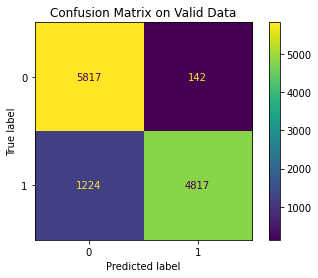

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.83      0.98      0.89      5959
           1       0.97      0.80      0.88      6041

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.90      0.89      0.89     12000



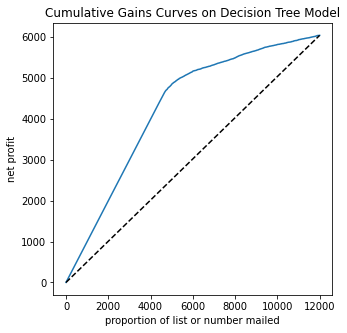

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(dt, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, dt_valid_pred))

# Cumulative gains curves of Decision Tree model
dt_prob = dt.predict_proba(X_valid_norm)

dt_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in dt_prob],
    'p(1)': [p[1] for p in dt_prob],
    'predicted': dt.predict(X_valid_norm)})

dt_gains_df = dt_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(dt_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Decision Tree Model')
plt.show()

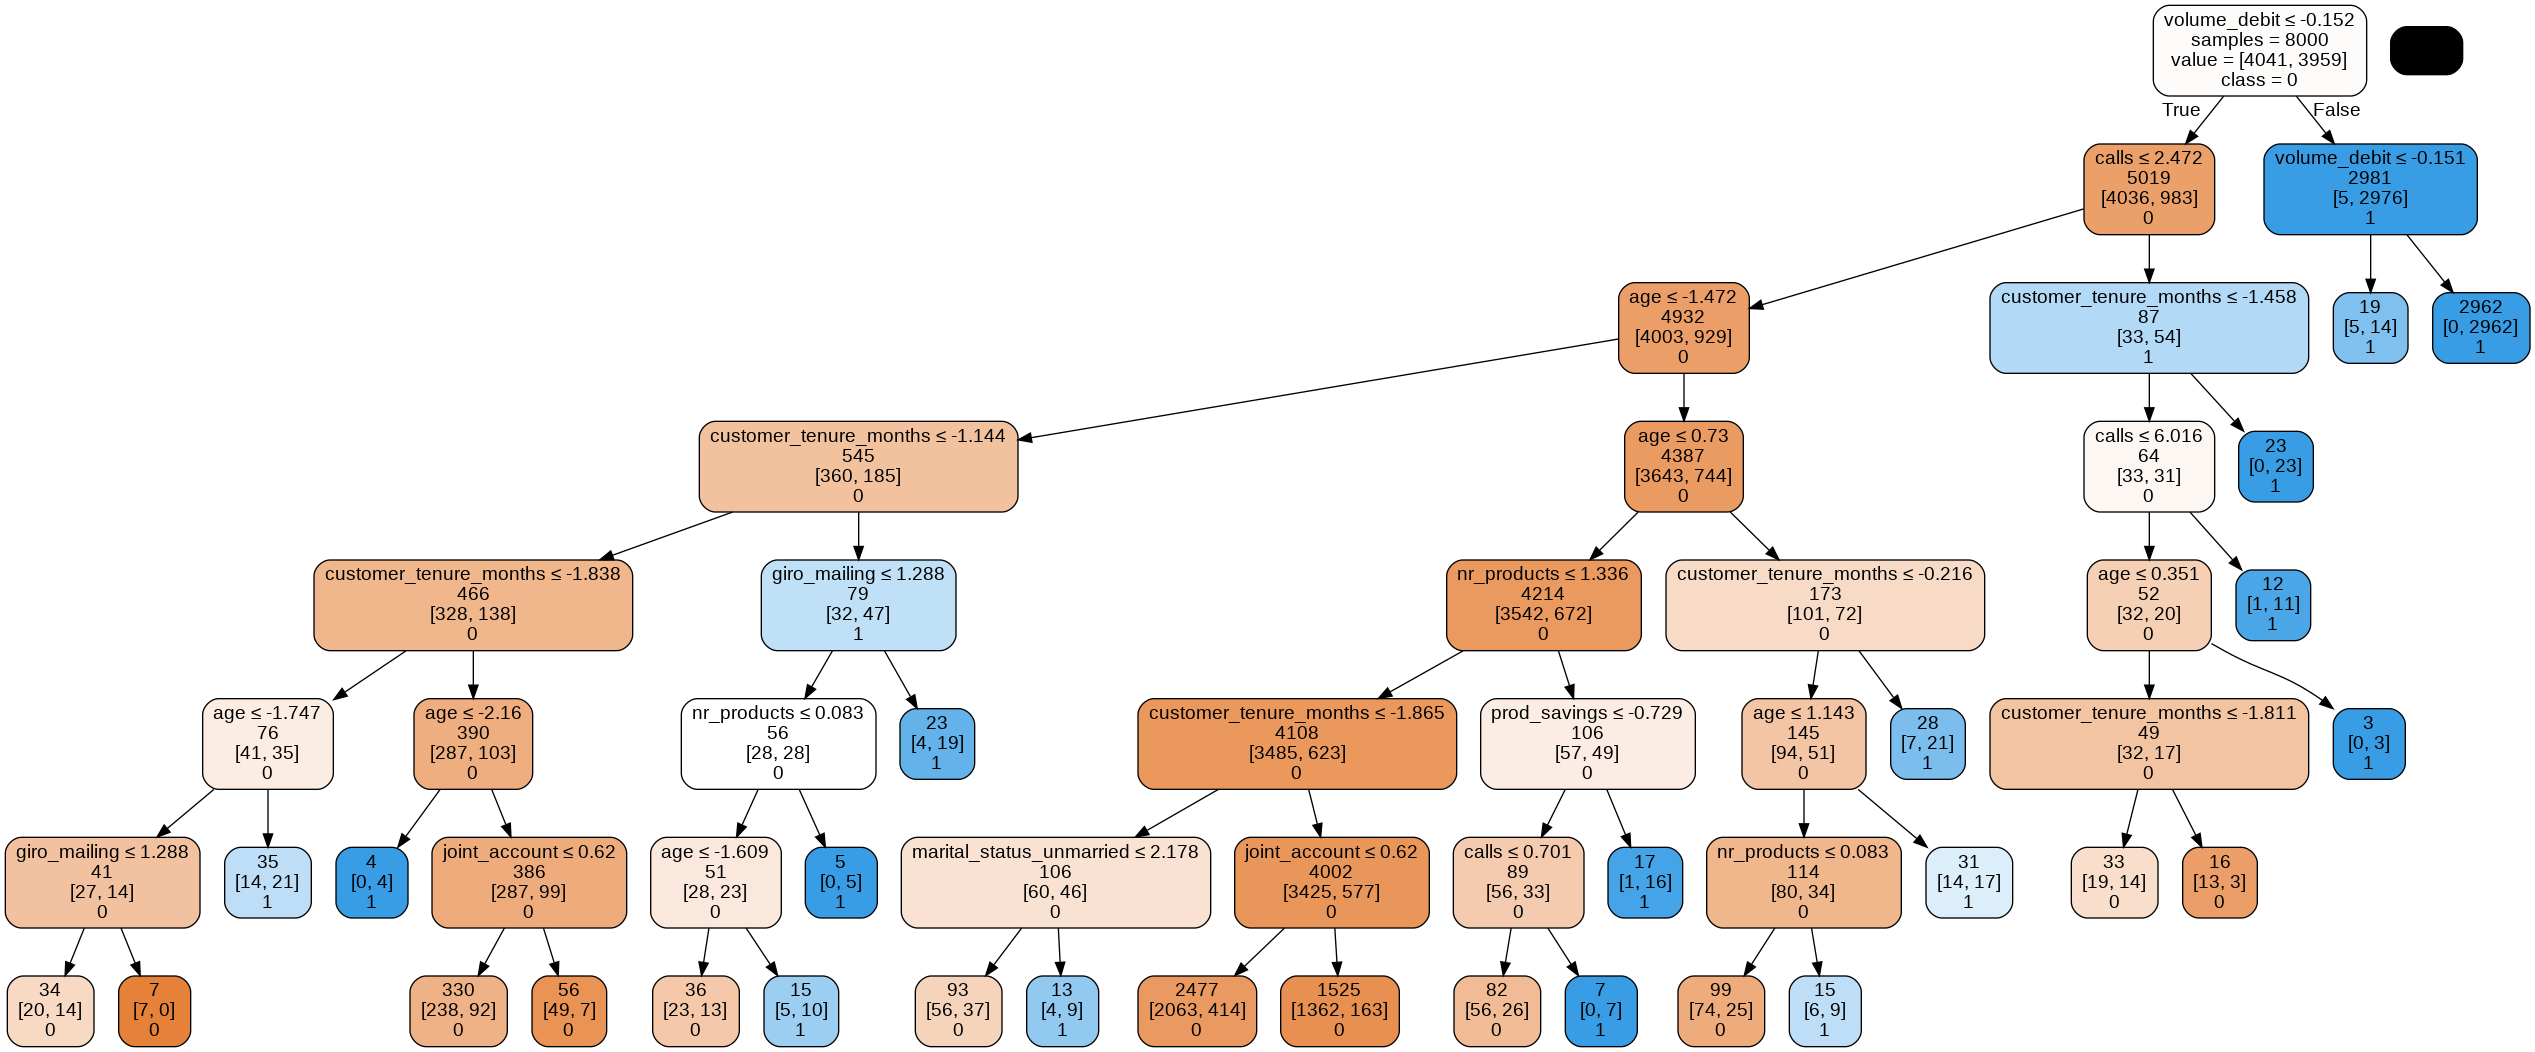

In [ ]:
# Plot the Decision Tree
plotDecisionTree(dt, feature_names=X_train.columns, class_names=dt.classes_)

### **Random Forest Model**

In [ ]:
# Look for the best parameters for the Random Forest model:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40,50],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [8, 10, 12]
}

gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5,
                          n_jobs=1)
gridSearch.fit(X_train_norm, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.884375
Initial parameters:  {'bootstrap': True, 'max_depth': 40, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 12}


In [ ]:
# Update the grid based on the initial grid
param_grid = {
    'bootstrap': [True],
    'max_depth': list(range(30, 45)),
    'max_features': [4],
    'min_samples_leaf': [1,2],
    'min_samples_split': [11,12,13]
}

gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5,
                          n_jobs=1)
gridSearch.fit(X_train_norm, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8845000000000001
Initial parameters:  {'bootstrap': True, 'max_depth': 33, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 12}


In [ ]:
# Apply best parameters to train Decision Tree Model
rf = RandomForestClassifier(max_depth=11, max_features=4, min_samples_leaf=1,
                            min_samples_split=7)
rf.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
rf_train_pred = rf.predict(X_train_norm)
rf_valid_pred = rf.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
rf_train_score = accuracy_score(rf_train_pred, y_train)
rf_valid_score = accuracy_score(rf_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(rf_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(rf_valid_score, 2)))

Training Set Accuracy:0.9
Valid Set Accuracy:0.89


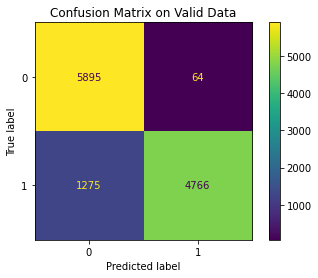

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(rf, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

In [ ]:
# Classification Report
print('Classificaiton Summary for Valid Set::')
print(classification_report(y_valid, rf_valid_pred))

Classificaiton Summary for Valid Set::
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      5959
           1       0.99      0.79      0.88      6041

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.91      0.89      0.89     12000



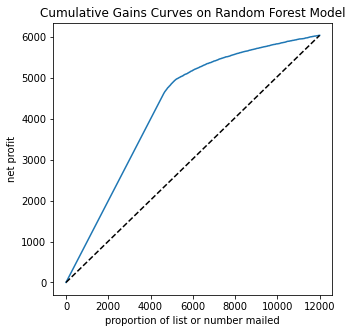

In [ ]:
# Cumulative gains curves of Random Forest model

# Probability values
rf_prob = rf.predict_proba(X_valid_norm)

rf_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in rf_prob],
    'p(1)': [p[1] for p in rf_prob],
    'predicted': rf.predict(X_valid_norm)})

rf_gains_df = rf_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(rf_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Random Forest Model')
plt.show()

                      feature  importance       std
6    member_get_member_active    0.000373  0.000599
17     marital_status_widowed    0.000619  0.000754
7   member_get_member_passive    0.000939  0.001951
2                  complaints    0.001131  0.000933
14   marital_status_separated    0.001306  0.001193
12    marital_status_divorced    0.001408  0.001076
18     ext_purchase_power_2.0    0.002085  0.001205
22     ext_purchase_power_6.0    0.002298  0.001410
19     ext_purchase_power_3.0    0.002311  0.001336
21     ext_purchase_power_5.0    0.002539  0.001646
20     ext_purchase_power_4.0    0.002684  0.001702
23     ext_purchase_power_7.0    0.002797  0.001635
16   marital_status_unmarried    0.004086  0.006253
4                      gender    0.004901  0.004351
15      marital_status_single    0.005123  0.007220
13     marital_status_married    0.009656  0.014313
11               giro_mailing    0.012008  0.013122
1                       calls    0.014942  0.004704
5           

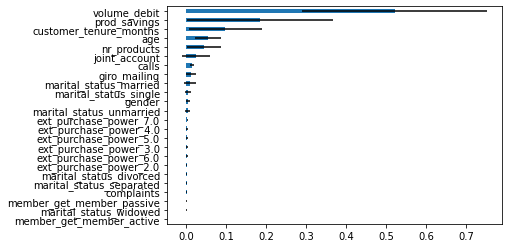

In [ ]:
# Check variable importance:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x = 'feature', legend= False)
ax.set_ylabel('')
plt.show()

### **Boosted Tree Model**

In [ ]:
# Run Boosted Tree
boost = GradientBoostingClassifier()
boost.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
boost_train_pred = boost.predict(X_train_norm)
boost_valid_pred = boost.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
boost_train_score = accuracy_score(boost_train_pred, y_train)
boost_valid_score = accuracy_score(boost_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(boost_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(boost_valid_score, 2)))

Training Set Accuracy:0.89
Valid Set Accuracy:0.89


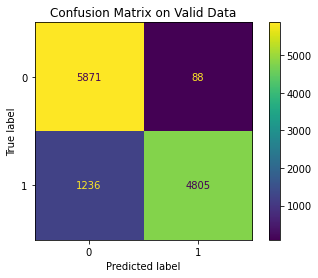

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5959
           1       0.98      0.80      0.88      6041

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.90      0.89      0.89     12000



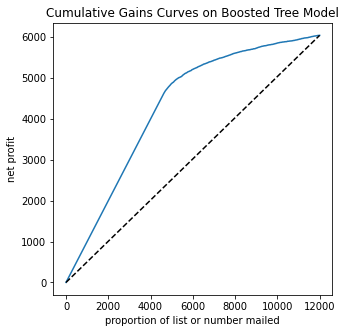

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(boost, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, boost_valid_pred))

# Cumulative gains curves of Boosted Tree model
boost_prob = boost.predict_proba(X_valid_norm)

boost_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in boost_prob],
    'p(1)': [p[1] for p in boost_prob],
    'predicted': boost.predict(X_valid_norm)})

boost_gains_df = boost_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(boost_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Boosted Tree Model')
plt.show()

### **AdaBoost Model**

In [ ]:
# Run Boosted Tree
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
adaboost_train_pred = adaboost.predict(X_train_norm)
adaboost_valid_pred = adaboost.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
adaboost_train_score = accuracy_score(adaboost_train_pred, y_train)
adaboost_valid_score = accuracy_score(adaboost_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(adaboost_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(adaboost_valid_score, 2)))

Training Set Accuracy:0.89
Valid Set Accuracy:0.89


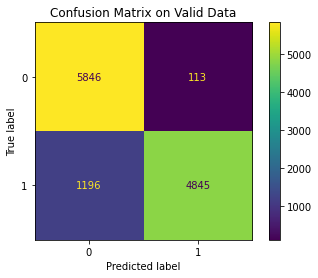

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5959
           1       0.98      0.80      0.88      6041

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.90      0.89      0.89     12000



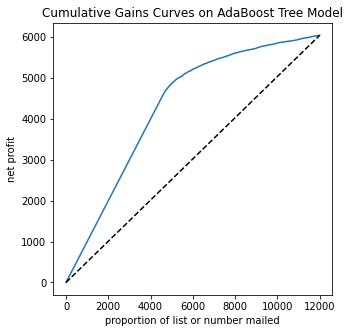

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(adaboost, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, adaboost_valid_pred))

# Cumulative gains curves of Boosted Tree model
adaboost_prob = adaboost.predict_proba(X_valid_norm)

adaboost_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in adaboost_prob],
    'p(1)': [p[1] for p in adaboost_prob],
    'predicted': adaboost.predict(X_valid_norm)})

adaboost_gains_df = adaboost_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(boost_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on AdaBoost Tree Model')
plt.show()

### **Neural Network Model**

In [ ]:
# Train neural network model
nn = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs',
                    random_state=1)
nn.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
nn_train_pred = nn.predict(X_train_norm)
nn_valid_pred = nn.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
nn_train_score = accuracy_score(nn_train_pred, y_train)
nn_valid_score = accuracy_score(nn_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(nn_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(nn_valid_score, 2)))

Training Set Accuracy:0.85
Valid Set Accuracy:0.85


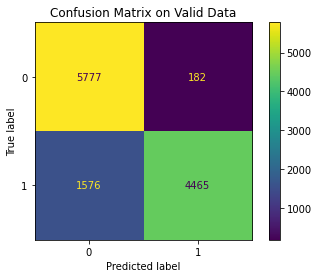

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      5959
           1       0.96      0.74      0.84      6041

    accuracy                           0.85     12000
   macro avg       0.87      0.85      0.85     12000
weighted avg       0.87      0.85      0.85     12000



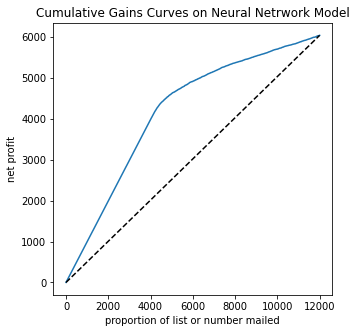

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(nn, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, nn_valid_pred))

# Cumulative gains curves of Logistic Regression model
nn_prob = nn.predict_proba(X_valid_norm)

nn_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in nn_prob],
    'p(1)': [p[1] for p in nn_prob],
    'predicted': nn.predict(X_valid_norm)})

nn_gains_df = nn_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(nn_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Neural Netrwork Model')
plt.show()

### **Support Vector Machine Model (SVM)**

In [ ]:
# Train svm model
svm = SVC(kernel='linear')
svm.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
svm_train_pred = svm.predict(X_train_norm)
svm_valid_pred = svm.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
svm_train_score = accuracy_score(svm_train_pred, y_train)
svm_valid_score = accuracy_score(svm_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(nn_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(nn_valid_score, 2)))

Training Set Accuracy:0.85
Valid Set Accuracy:0.85


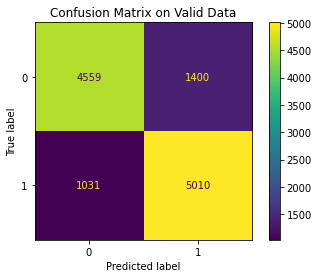

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      5959
           1       0.78      0.83      0.80      6041

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



AttributeError: ignored

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(svm, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, svm_valid_pred))

# Plot the cumulative gains chart of the expected spending
gains_df = pd.DataFrame({'actual': y_valid,
                         'prob': svm.predict(X_valid_norm)})
gains_df = gains_df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
gainsChart(gains_df.actual)
plt.show()

### **Linear Discriminant Analysis**

In [ ]:
# Train Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)

# Prediction on Training/valid Dataset
lda_train_pred = lda.predict(X_train_norm)
lda_valid_pred = lda.predict(X_valid_norm)

# Accuracy score on Training/valid Dataset
lda_train_score = accuracy_score(lda_train_pred, y_train)
lda_valid_score = accuracy_score(lda_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(lda_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(lda_valid_score, 2)))

Training Set Accuracy:0.8
Valid Set Accuracy:0.8


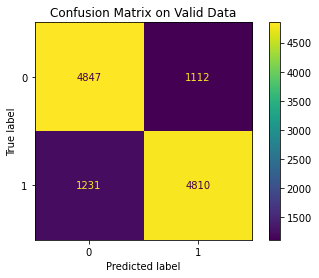

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      5959
           1       0.81      0.80      0.80      6041

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



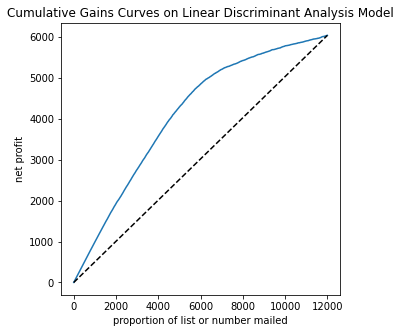

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(lda, X_valid_norm, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, lda_valid_pred))

# Cumulative gains curves of Logistic Regression model
lda_prob = lda.predict_proba(X_valid_norm)

lda_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in lda_prob],
    'p(1)': [p[1] for p in lda_prob],
    'predicted': lda.predict(X_valid_norm)})

lda_gains_df = lda_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(lda_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Linear Discriminant Analysis Model')
plt.show()

### **Naive Bayes Classifiers**

In [ ]:
# Train Naive Bayes Classifiers
nbc = MultinomialNB(alpha=0.001)
nbc.fit(X_train, y_train)

# Prediction on Training/valid Dataset
nbc_train_pred = nbc.predict(X_train)
nbc_valid_pred = nbc.predict(X_valid)

# Accuracy score on Training/valid Dataset
nbc_train_score = accuracy_score(nbc_train_pred, y_train)
nbc_valid_score = accuracy_score(nbc_valid_pred, y_valid)

print('Training Set Accuracy:{}'.format(round(nbc_train_score, 2)))
print('Valid Set Accuracy:{}'.format(round(nbc_valid_score, 2)))

Training Set Accuracy:0.85
Valid Set Accuracy:0.85


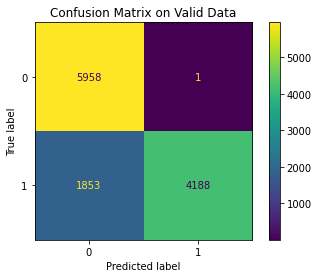

Classificaiton Summary for Valid Set:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      5959
           1       1.00      0.69      0.82      6041

    accuracy                           0.85     12000
   macro avg       0.88      0.85      0.84     12000
weighted avg       0.88      0.85      0.84     12000



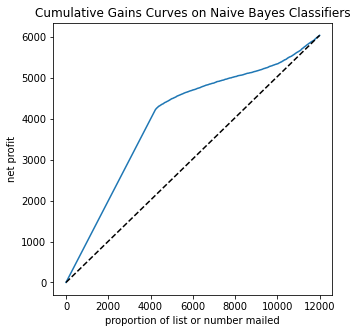

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(nbc, X_valid, y_valid)
plt.title('Confusion Matrix on Valid Data')
plt.show()

# Classification Report
print('Classificaiton Summary for Valid Set:')
print(classification_report(y_valid, nbc_valid_pred))

# Cumulative gains curves of Logistic Regression model
nbc_prob = nbc.predict_proba(X_valid)

nbc_gains_df = pd.DataFrame({
    'actual' : y_valid,
    'p(0)': [p[0] for p in nbc_prob],
    'p(1)': [p[1] for p in nbc_prob],
    'predicted': nbc.predict(X_valid)})

nbc_gains_df = nbc_gains_df.sort_values(by=['p(1)'], ascending=False).reset_index(drop=True)

gainsChart(nbc_gains_df.actual, figsize=[5, 5])
plt.xlabel('proportion of list or number mailed')
plt.ylabel('net profit')
plt.title('Cumulative Gains Curves on Naive Bayes Classifiers')
plt.show()

## **Final Model Selection**

Text(0.5, 1.0, 'Gains Chart on All models')

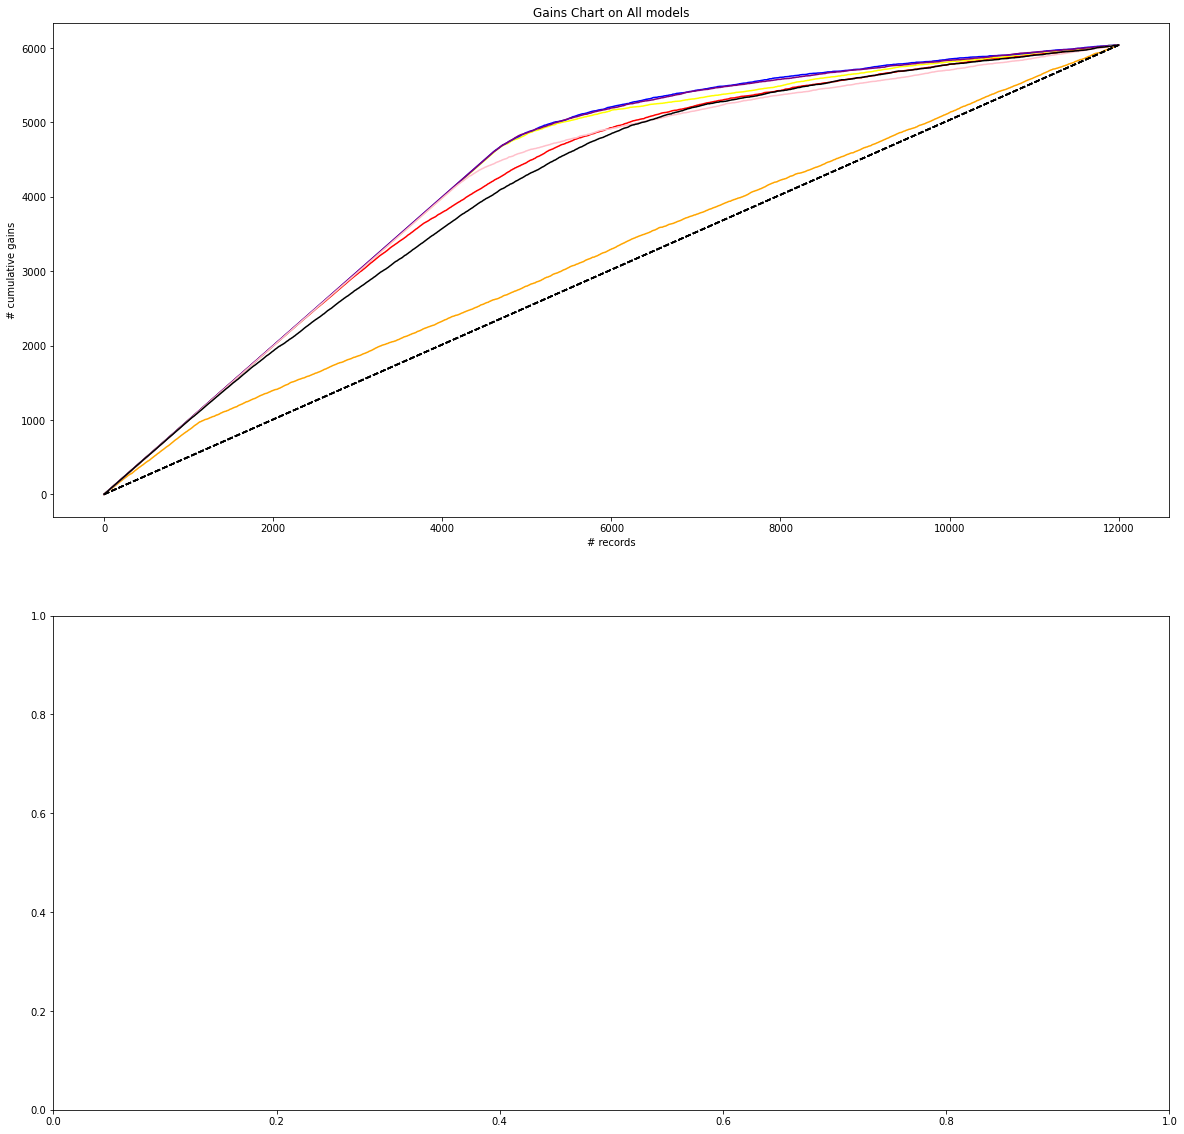

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

def modelGainsChart(model, title, colormap, ax=None):
  result = pd.DataFrame({
      'actual': y_valid,
      'prob': model.predict_proba(X_valid_norm)[:, 1]
      })
  
  result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
  ax = gainsChart(result.actual, ax=ax, color=colormap)
  ax.set_title(title)
  return ax

ax = modelGainsChart(log, 'Logistic regression','red', axes[0])
modelGainsChart(knn, 'K-Nearest Neighbor','orange', axes[0])
modelGainsChart(dt, 'Decision Tree','yellow', axes[0])
#modelGainsChart(rf, 'Random Forest','green', axes[0])
modelGainsChart(boost, 'Boosted Tree', 'blue', axes[0])
modelGainsChart(adaboost, 'AdaBoosted Tree', 'purple', axes[0])
modelGainsChart(nn, 'Neural network', 'pink', axes[0])
#modelGainsChart(svm, 'Support Vector Machine Model', 'brown', axes[0])
modelGainsChart(lda, 'Linear Discriminant Analysis', 'black', axes[0])
#modelGainsChart(nbc, 'Naive Bayes Classifiers', 'grey', axes[0])

ax.set_title('Gains Chart on All models')

In [ ]:
from matplotlib import legend
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

def modelGainsChart(model, title, colormap, ax=None):
  result = pd.DataFrame({
      'actual': y_valid,
      'prob': model.predict(X_valid_norm)})
  
  result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
  ax = gainsChart(result.actual, ax=ax, color=colormap)
  
  ax.set_title(title)
  ax.legend();
  return ax

ax = modelGainsChart(log, 'Logistic regression','red', axes[0])
modelGainsChart(knn, 'K-Nearest Neighbor','orange', axes[0])
modelGainsChart(dt, 'Decision Tree','yellow', axes[0])
modelGainsChart(rf, 'Random Forest','green', axes[0])
modelGainsChart(boost, 'Boosted Tree', 'blue', axes[0])
modelGainsChart(adaboost, 'AdaBoosted Tree', 'purple', axes[0])
modelGainsChart(nn, 'Neural network', 'pink', axes[0])
modelGainsChart(svm, 'Support Vector Machine Model', 'brown', axes[0])
modelGainsChart(lda, 'Linear Discriminant Analysis', 'black', axes[0])
modelGainsChart(nbc, 'Naive Bayes Classifiers', 'grey', axes[0])
ax.set_title('Gains Chart on All models')

In [ ]:
# Variable importance for the best model SVM
df=pd.Series(abs(svm.coef_[0]), index=X_train.columns).nlargest(20).plot(kind='barh')